In [163]:
import numpy as np

np.random.seed(seed=1)

In [19]:
N = 200
K = 3
T =  np.zeros((N,3), dtype=np.uint8)
X = np.zeros((N,2))

X_range0 = [-3,3]
X_range1 = [-3,3]

Mu = np.array([[-.5, -.5],[.5, 1.0],[1,-.5]])
Sig = np.array([[.7,.7],[.8,.3],[.3,.8]])
Pi = np.array([0.4 , 0.8 , 1])

for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T[n,k] =1
            break
    for k in range(2):
        X[n,k] = np.random.randn() * Sig[T[n,:]== 1 , k] + Mu[T[n,:]==1 , k]

In [26]:
TestRatio = 0.5
X_n_training = int(N * TestRatio)

X_train = X[:X_n_training, :]
X_test = X[X_n_training:, :]

T_train = T[:X_n_training, :]
T_test = T[X_n_training:, :]

# np.savez('class_data.npz', X_train = X_train, T_train= T_train, X_test=X_test, T_test = T_test, X_range0 = X_range0, X_range1=X_range1)


3클래스 분류 문제의 인공 데이터


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# 데이터 그리기
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0],[.5, .5, .5],[1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1],
                linestyle = 'none',
                marker = 'o', markeredgecolor = 'black',
                color = c[i], alpha = 0.8)
    plt.grid(True)

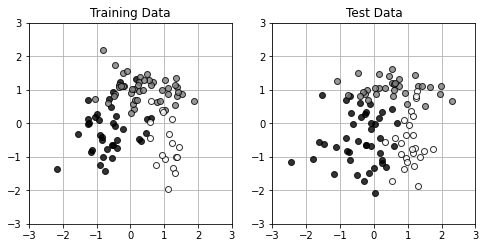

In [29]:
plt.figure(1, figsize=(8, 3.7))
plt.subplot(1, 2, 1)
Show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')

plt.subplot(1, 2, 2)
Show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()

In [45]:
#Sigmoid Function
def Sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

def FNN(wv,M,K,x):
    N,D = x.shape
    w = wv[:M * (D+1)]
    w = w.reshape(M, (D+1))
    
    v = wv[M * (D + 1):]
    v = v.reshape((K, M+1))
    
    b = np.zeros((N, M +1))
    z = np.zeros((N, M +1))
    a = np.zeros((N, K))
    y = np.zeros((N, K))
    
    for n in range(N):
        for m in range(M):
            b[n,m] = np.dot(w[m,:], np.r_[x[n,:],1])
            z[n,m] = Sigmoid(b[n,m])
        #출력층 계산
        z[n,M] = 1
        wkz = 0
        
        for k in range(K):
            a[n,k] = np.dot(v[k, : ],z[n,:])
            wkz = wkz + np.exp(a[n,k])
        
        for k in range(K):
            y[n,k] = np.exp(a[n,k]) / wkz
            
    return y,a,z,b

In [62]:
WV = np.ones(15)
M = 2
K = 3
FNN(WV, M,K,X_train[:2,:])

(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[1.76612503, 1.76612503, 1.76612503],
        [2.37549195, 2.37549195, 2.37549195]]),
 array([[0.38306251, 0.38306251, 1.        ],
        [0.68774598, 0.68774598, 1.        ]]),
 array([[-0.47656951, -0.47656951,  0.        ],
        [ 0.78960251,  0.78960251,  0.        ]]))

In [63]:
def CE_FNN(wv, M,K,x,t):
    N,D = x.shape
    y,a,z,b = FNN(wv,M,K,x)
    ce = -np.dot(np.log(y.reshape(-1)), t.reshape(-1)/N)
    return ce

In [64]:
WV = np.ones(15)
M = 2
K = 3
CE_FNN(WV,M,K,X_train[:2,:],T_train[:2,:])

1.0986122886681096

In [68]:
def dCE_FNN_num(wv, M,K,x,t):
    epsilon = 0.001
    dwv = np.zeros_like(wv)
    for iwv in range(len(wv)):
        wv_modified = wv.copy()
        
        wv_modified[iwv] = wv[iwv]-epsilon
        mse1 = CE_FNN(wv_modified, M, K, x, t)
        
        wv_modified[iwv]= wv[iwv] + epsilon
        mse2 = CE_FNN(wv_modified, M,K,x,t)
        
        dwv[iwv] = (mse2 - mse1)/(2*epsilon)
    return dwv

In [82]:
def Show_WV(wv, M):
    N = wv.shape[0]
    
    plt.bar(range(1, M *3 +1),wv[:M * 3], align="center",color="black")
    plt.bar(range(M * 3 + 1, N+1),wv[M * 3:], align="center", color="cornflowerblue")
    plt.xticks(range(1,N+1))
    plt.xlim(0,N+1)

[ 0.12238665  0.06384939 -0.21673472 -0.01699871 -0.00548795  0.03212272
 -0.13474288 -0.07893412 -0.61293237  0.00675396  0.00401641  0.03081264
  0.12798892  0.07491772  0.58211974]


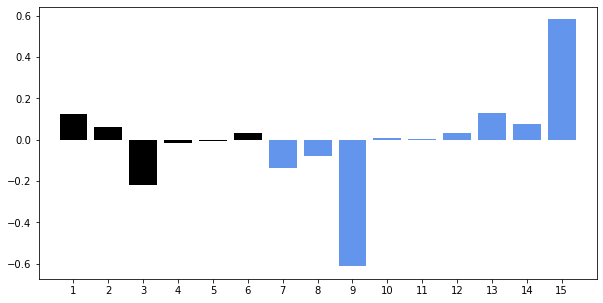

In [84]:
M = 2
K = 3
nWV = M * 3 + K * (M+1)
np.random.seed(1)
WV = np.random.normal(0,1,nWV)

dWV = dCE_FNN_num(WV, M,K ,X_train[:2, :], T_train[:2,:])
print(dWV)

plt.figure(1, figsize=(10,5))
Show_WV(dWV,M)
plt.show()

경사하강법으로 Function Fit_FNN_num 풀어보기

In [85]:
import time

In [97]:
def Fit_FNN_num(wv_init, M, K, x_train,t_train,x_test,t_test,n,alpha):
    wvt = wv_init
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    
    wv_hist = np.zeros((n,len(wv_init)))
    epsilon = 0.001
    
    for i in range(n):
        wvt = wvt - alpha * dCE_FNN_num(wvt, M, K , x_train, t_train)
        err_train[i] = CE_FNN(wvt, M, K ,x_train , t_train)
        err_test[i] = CE_FNN(wvt, M, K ,x_test , t_test)
        wv_hist[i,:] = wvt
    
    return wvt, wv_hist, err_train, err_test

In [98]:
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M*3 + K * (M+1))

In [99]:
#학습단계
N_step = 1000
alpha = 0.5

WV, WV_hist, Err_train, Err_test = Fit_FNN_num(WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:138.320 sec


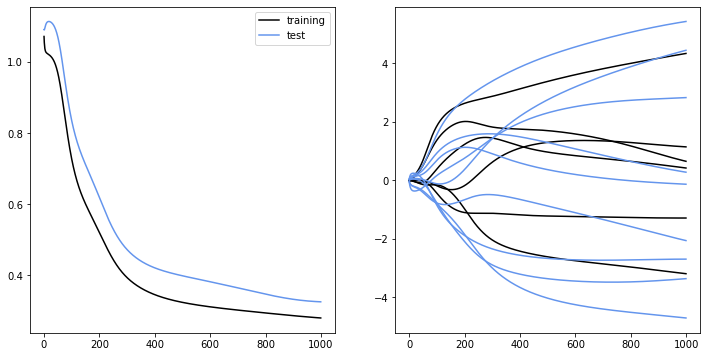

In [162]:
#위에거 그래프로 보기
plt.figure(1,figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label='test')
plt.legend()
# plt.show()

#가중치의 시간 변화의 표시
# plt.figure(1, figsize=(3,3))
plt.subplot(1, 2, 2)
plt.plot(WV_hist[:,:M*3:],'black')
plt.plot(WV_hist[:,M*3:], 'cornflowerblue')
plt.show()

In [143]:
# #가중치의 시간 변화의 표시
# #위에 Plt figure 사용법
# plt.figure(1, figsize=(3,3))
# plt.plot(WV_hist[:,:M*3:],'black')
# plt.plot(WV_hist[:,M*3:], 'cornflowerblue')
# plt.show()

In [149]:
def show_FNN(wv, M,K):
    xn = 60
    x0 = np.linspace(X_range0[0], X_range0[1],xn)
    x1 = np.linspace(X_range1[0], X_range1[1],xn)
    xx0, xx1 = np.meshgrid(x0,x1)
    x = np.c_[np.reshape(xx0, xn * xn , 'f'), np.reshape(xx1, xn * xn , 'f')]
    y, a,z,b = FNN(wv,M,K,x)
    plt.figure(1, figsize=(4,4))
    
    for ic in range(K):
        f = y[:,ic]
        f = f.reshape(xn, xn)
        f = f.T
        cont = plt.contour(xx0 ,xx1, f, levels=[0.8,0.9],colors=['cornflowerblue', 'black'])
        cont.clabel(fmt='%1.1f',fontsize=9)
    
    plt.xlim(X_range0)
    plt.ylim(X_range1)

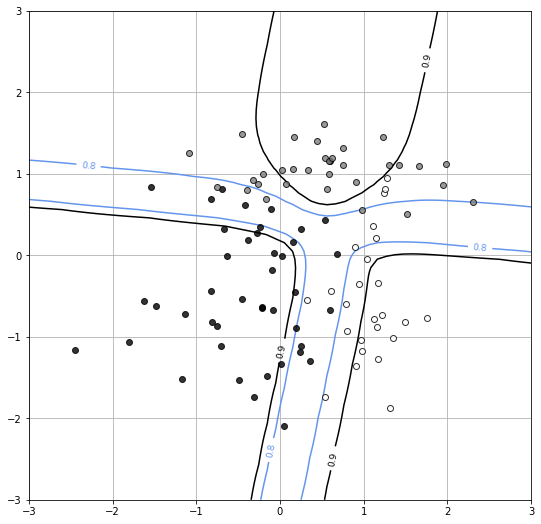

In [155]:
plt.figure(1, figsize=(9,9))
Show_data(X_test,T_test)
show_FNN(WV,M,K)
plt.show()